IntSlider(value=50, description='Param1:', max=200)

IntSlider(value=150, description='Param2:', max=200)

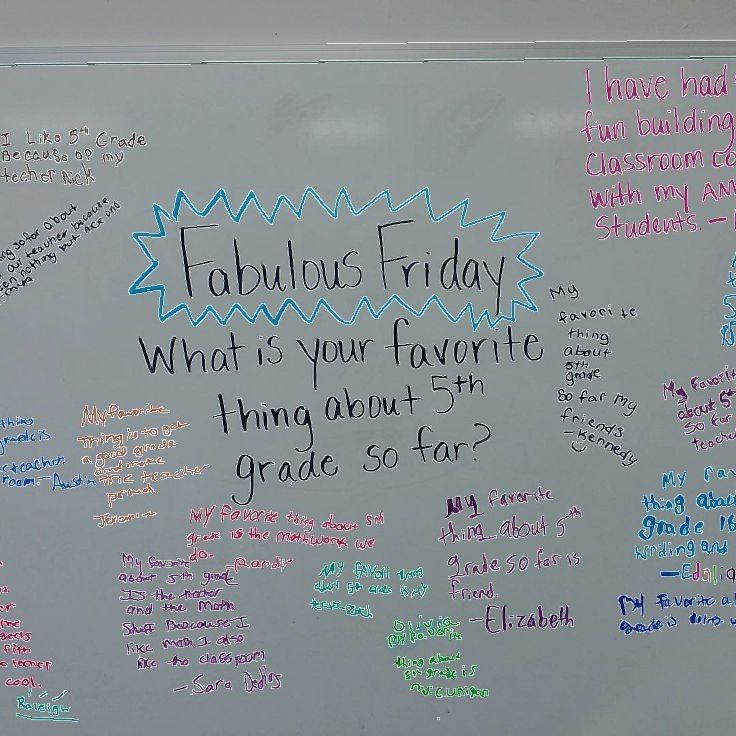

In [2]:
import cv2
import ipywidgets as widgets
from IPython.display import display
from PIL import Image
import numpy as np

# Function to update edge detection when slider values change
def update_edges(change):
    param1_val = param1_slider.value
    param2_val = param2_slider.value
    edges = cv2.Canny(img_gray, param1_val, param2_val)
    edges_rgb = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)
    img_with_edges = cv2.addWeighted(img_rgb, 0.7, edges_rgb, 0.3, 0)
    img_with_edges_pil = Image.fromarray(img_with_edges)
    display(img_with_edges_pil)

# Load the image
img = cv2.imread("whiteboardWithTextEx.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# Create sliders for adjusting parameters
param1_slider = widgets.IntSlider(value=50, min=0, max=200, description='Param1:')
param1_slider.observe(update_edges, 'value')
display(param1_slider)

param2_slider = widgets.IntSlider(value=150, min=0, max=200, description='Param2:')
param2_slider.observe(update_edges, 'value')
display(param2_slider)

# Initial edge detection
edges_initial = cv2.Canny(img_gray, param1_slider.value, param2_slider.value)
edges_rgb_initial = cv2.cvtColor(edges_initial, cv2.COLOR_GRAY2RGB)
img_with_edges_initial = cv2.addWeighted(img_rgb, 0.7, edges_rgb_initial, 0.3, 0)
img_with_edges_pil_initial = Image.fromarray(img_with_edges_initial)
display(img_with_edges_pil_initial)
